# Clustering  con K-means - Catado de cafe
Se tiene una base de datos con los resultados de diferentes catados de multiples muestras de cafe.Se desea realizar un agrupamiento de estas muestras segun sus metricas estadisticas por cada una de estas variables. Entre ellas se encuentra la calificacion promedio del catador certificado y niveles de sabor Vainilla, floral, cereral, cocoa, alcohol, fermentado, tostado, oscuro, amargo, entre muchas otras.

In [252]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import os

%matplotlib inline

## Importando Dataset y visualizando sus Caracteristicas

In [253]:
cafes = pd.read_csv('../../datasets/catacafe.csv',engine='python')
cafes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cafe                   178 non-null    int64  
 1   Dulce                  178 non-null    float64
 2   Floral                 178 non-null    float64
 3   Especias               178 non-null    float64
 4   Tostado                178 non-null    float64
 5   Frutal                 178 non-null    int64  
 6   Fermentado             178 non-null    float64
 7   Vegetal                178 non-null    float64
 8   Otro                   178 non-null    float64
 9   Cocoa                  178 non-null    float64
 10  Cereal                 178 non-null    float64
 11  Vainilla               178 non-null    float64
 12  Picante                178 non-null    float64
 13  Calificacion promedio  178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Mostrar las primeras filas para una previsualizacion del orden de los datos

In [254]:
cafes.head()

,Cafe,Dulce,Floral,Especias,Tostado,Frutal,Fermentado,Vegetal,Otro,Cocoa,Cereal,Vainilla,Picante,Calificacion promedio
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Se puede ver que la columna "Cafe" es el indice numerico de la muestra, pero que ya se ha enumerado con el metodo de lectura, por ello, se procede a eliminarla

In [255]:
cafes = cafes.drop(['Cafe'],axis=1)
cafes.head()


,Dulce,Floral,Especias,Tostado,Frutal,Fermentado,Vegetal,Otro,Cocoa,Cereal,Vainilla,Picante,Calificacion promedio
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Se obtienen las variables estadisticas de los datos por columna

In [256]:
cafes.describe()

,Dulce,Floral,Especias,Tostado,Frutal,Fermentado,Vegetal,Otro,Cocoa,Cereal,Vainilla,Picante,Calificacion promedio
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Se normalizan los datos en un rango adecuado y se vuelven a obtener sus metricas

In [257]:
cafes_normalizado = (cafes - cafes.min())/(cafes.max()-cafes.min())
cafes_normalizado.describe()

,Dulce,Floral,Especias,Tostado,Frutal,Fermentado,Vegetal,Otro,Cocoa,Cereal,Vainilla,Picante,Calificacion promedio
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Se puede observar que ahora los datos tienen valores entre cero y uno, max y min. Ahora con este preprocesamiento se tienen datos ordenados, numericos y normalizados, listos para un agrupamiento optimo.
El metodo de KMeans presenta gran efectividad y velocidad para datos no tan amplios, sin embargo, su principal debilidad es la seleccion de parametros de entrada, entiendase numero de clusters a realizar. Como este valor no se conoce, se debe usaralgun metodo para optimizar su implementacio, en este caso se utilizara el metodo del codo de Jambu para encontrar un numero de clusters optimo:

## Obtencion de grafica del codo de Jambu

Se desean que los clusteres sean lo mas separados entre si y que sus elementos sean lo mas cercanos entre si. para ello se Utiliza WCSS: la suma de los cuadrados de las distancias de cada punto de datos en todos los grupos a sus respectivos centroides, es decir, es una medida de similitud.
La idea es minimizar esta suma. Para ello se obtiene la inercia de cada clustering realizado con KMeans para un cierto numero de grupos, desde 1 hasta uno deseado, estos valores obtenidos en cada iteracion se almacena en WCSS, donde luego se imprimen en una grafica para su analisis.

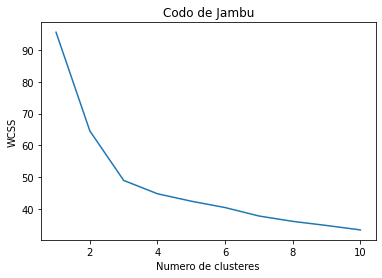

In [258]:
num_clusters = 10
wcss = []
for i in range(1,num_clusters+1):
    kmeans_model = KMeans(n_clusters=i,max_iter=300)
    kmeans_model.fit(cafes_normalizado)
    wcss.append(kmeans_model.inertia_)

## Ahora se grafican los resultados:

plt.plot(range(1,num_clusters+1),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Numero de clusteres")
plt.ylabel("WCSS")
plt.show()

Se observa que le numero de clusteres optimo es 3, para este metodo y este dataset. Ahora se procede a utilizar el metodo Kmeans con este parametro. Igual que anteriormente, se crea el modelo de clustering y luego se aplica con .fit

In [259]:
agrupamiento =  KMeans(n_clusters=3, max_iter=300) 
agrupamiento.fit(cafes_normalizado)

KMeans(n_clusters=3)

Este metodo crea un atributo label_ dentro del modelo clustering generado. Se agrega esta calificacion al archivo original del Dataset:

In [260]:
cafes['KMeans_clusters'] = agrupamiento.labels_
cafes.head()

,Dulce,Floral,Especias,Tostado,Frutal,Fermentado,Vegetal,Otro,Cocoa,Cereal,Vainilla,Picante,Calificacion promedio,KMeans_clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


## Visualizacion de los clusters Generados
Los datos tienen multiples variables que los caracterizan, en este caso se desea visualizar un grafico lo mayor resumido posible, y se alcanza a visualizar hasta tres dimensiones.

Para efectos didacticos, se mostraran en dos dimensiones ¿Cuales? se seleccionan las variables que mejor caractericen a todos los datos, para ello se hace uso del Analaisis de Componentes Principales (PCA) para reducir el numero de variables a analizar, en este caso a visualizar.
Se hace uso del paquete descomposition de sklearn, se crea un dataframe a partir de estos componentes para graficarlo.

In [261]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)                                   # Dos componentes principales
pca_cafes = pca.fit_transform(cafes_normalizado)
pca_cafes_df = pd.DataFrame(data= pca_cafes, columns=['Componente_1', 'Componente_2'])
pca_names_cafes = pd.concat([pca_cafes_df, cafes[['KMeans_clusters']]], axis=1)

pca_names_cafes   # veamos el resultado de los datos procesados:

,Componente_1,Componente_2,KMeans_clusters
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,2
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,2
4,-0.202546,-0.059467,2
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


## Graficar el dataframe procesado
Ahora se configura la figura plot a mostrar con estos datos obtenidos

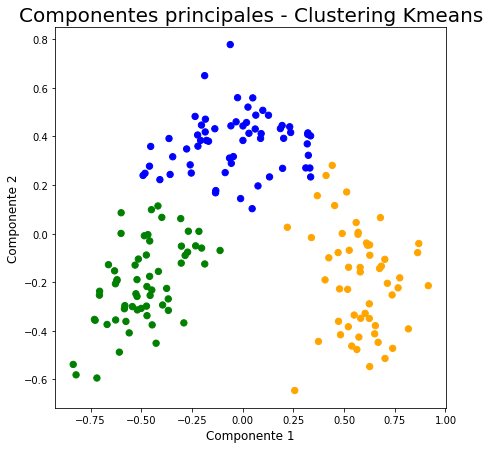

In [262]:
fig = plt.figure(figsize= (7,7))
grafico = fig.add_subplot(1,1,1)
grafico.set_xlabel('Componente 1',fontsize = 12 )
grafico.set_ylabel('Componente 2',fontsize = 12 )
grafico.set_title('Componentes principales - Clustering Kmeans',fontsize = 20 )
Colores = np.array(["blue", "orange", "green"])
grafico.scatter(x=pca_names_cafes.Componente_1, y=pca_names_cafes.Componente_2,c=Colores[pca_names_cafes.KMeans_clusters], s=40)
plt.show()

## Guardar los datos generados
Se procede a guardar el dataframe en formato csv:

In [267]:
cafes.to_csv('../../Results/cafe-kmeans.csv')   # Se crea un archivo csv en la carpeta Results

# Ejercicios/ Experimentos propuestos

## 1. Elija un valor aleatorio para el numero de clusters a implementar, suponiendo que no conoce el resultado del metodo codo de Jambu. ¿Como cambia el resultado? ¿Que se nota?
## 2. ¿Que sucede al aumentar o disminuir el numero de clusters a implementar en la llamada a KMeans? ¿Por que?
## 3. ¿Que sucede con los clusters al aumentar o disminuir significativamente el numero de iteraciones maximo (seteado en 300) al usar el metodo del Codo de Jambu y en la llamada a KMeans? ¿Por que?
## 4. Explique las ventajas y desventajas que tiene el algoritmo KMeans. Puede investigar difernetes fuentes.
## Aumente el numero de PCA a 3 componentes y grafiquelo en 3 Dimensiones. ¿Que es lo que cambio y que se esta añadiendo?

## Experimentos a realizar
Aumentar las variables PCA a 3, configurando el grafico para mostrarlo.

In [263]:
pca = PCA(n_components=3)
pca_cafes = pca.fit_transform(cafes_normalizado)
pca_cafes_df = pd.DataFrame(data= pca_cafes, columns=['Componente_1', 'Componente_2','Componente_3'])
pca_names_cafes = pd.concat([pca_cafes_df, cafes[['KMeans_clusters']]], axis=1)

pca_names_cafes   # veamos el resultado de los datos procesados:

,Componente_1,Componente_2,Componente_3,KMeans_clusters
0,-0.706336,-0.253193,0.024093,2
1,-0.484977,-0.008823,-0.280482,2
2,-0.521172,-0.189187,0.196217,2
3,-0.821644,-0.580906,0.081110,2
4,-0.202546,-0.059467,0.300240,2
...,...,...,...,...
173,0.739510,-0.471901,0.209360,1
174,0.581781,-0.348366,0.083590,1
175,0.626313,-0.546857,-0.030495,1
176,0.572991,-0.425516,-0.094537,1


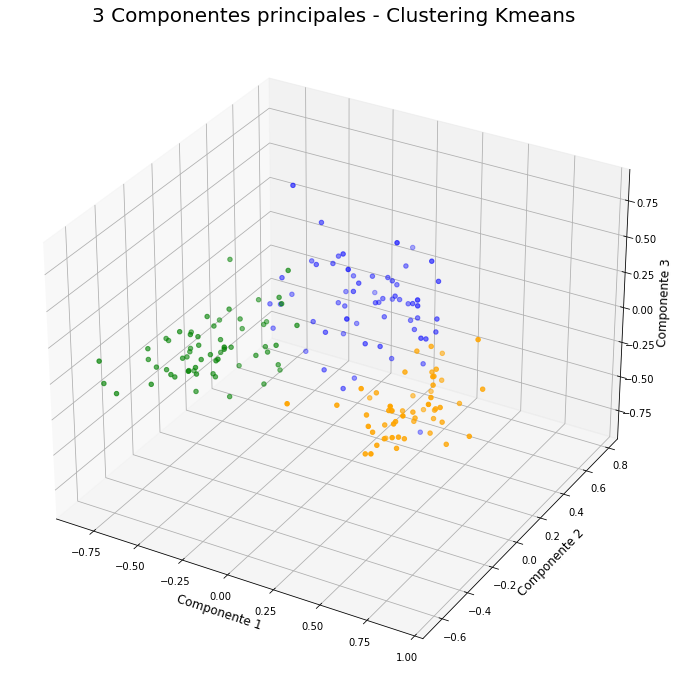

In [266]:
# Graficamos este nuevo dataframe en 3D
#from mpl_toolkits.mplot3d import Axes3D  #otra forma de plotearlo
#grafico = Axes3D(fig)

fig = plt.figure(figsize= (12,12))
grafico = fig.add_subplot(111, projection='3d')

x = pca_names_cafes.Componente_1
y = pca_names_cafes.Componente_2
z = pca_names_cafes.Componente_3

grafico.set_xlabel('Componente 1',fontsize = 12 )
grafico.set_ylabel('Componente 2',fontsize = 12 )
grafico.set_zlabel('Componente 3',fontsize = 12 )
grafico.set_title('3 Componentes principales - Clustering Kmeans',fontsize = 20 )
Colores = np.array(["blue", "orange", "green"])

# Agregamos los puntos en el plano 3D
grafico.scatter(x, y, z, c=Colores[pca_names_cafes.KMeans_clusters], marker='o')
plt.show()

# Como se puede observar, se esta agregando la tercer componente mas representativa del conjunto de datos, obtenida por medio de PCA, alcanzando la maxima visualizacion posible.
# Es posible mover el grafico 3D en algunos visualizadores y observar mejor la relacion entre los diferentes clusters.